<a href="https://colab.research.google.com/github/faizulhz/ProgrammingAssignment2/blob/master/sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classifier: Logistic Regression
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

------------------------------------------------------------
Classifier: K-Nearest Neighbors
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

------------------------------------------------------------
Classifier: Decision Tree
              precision   

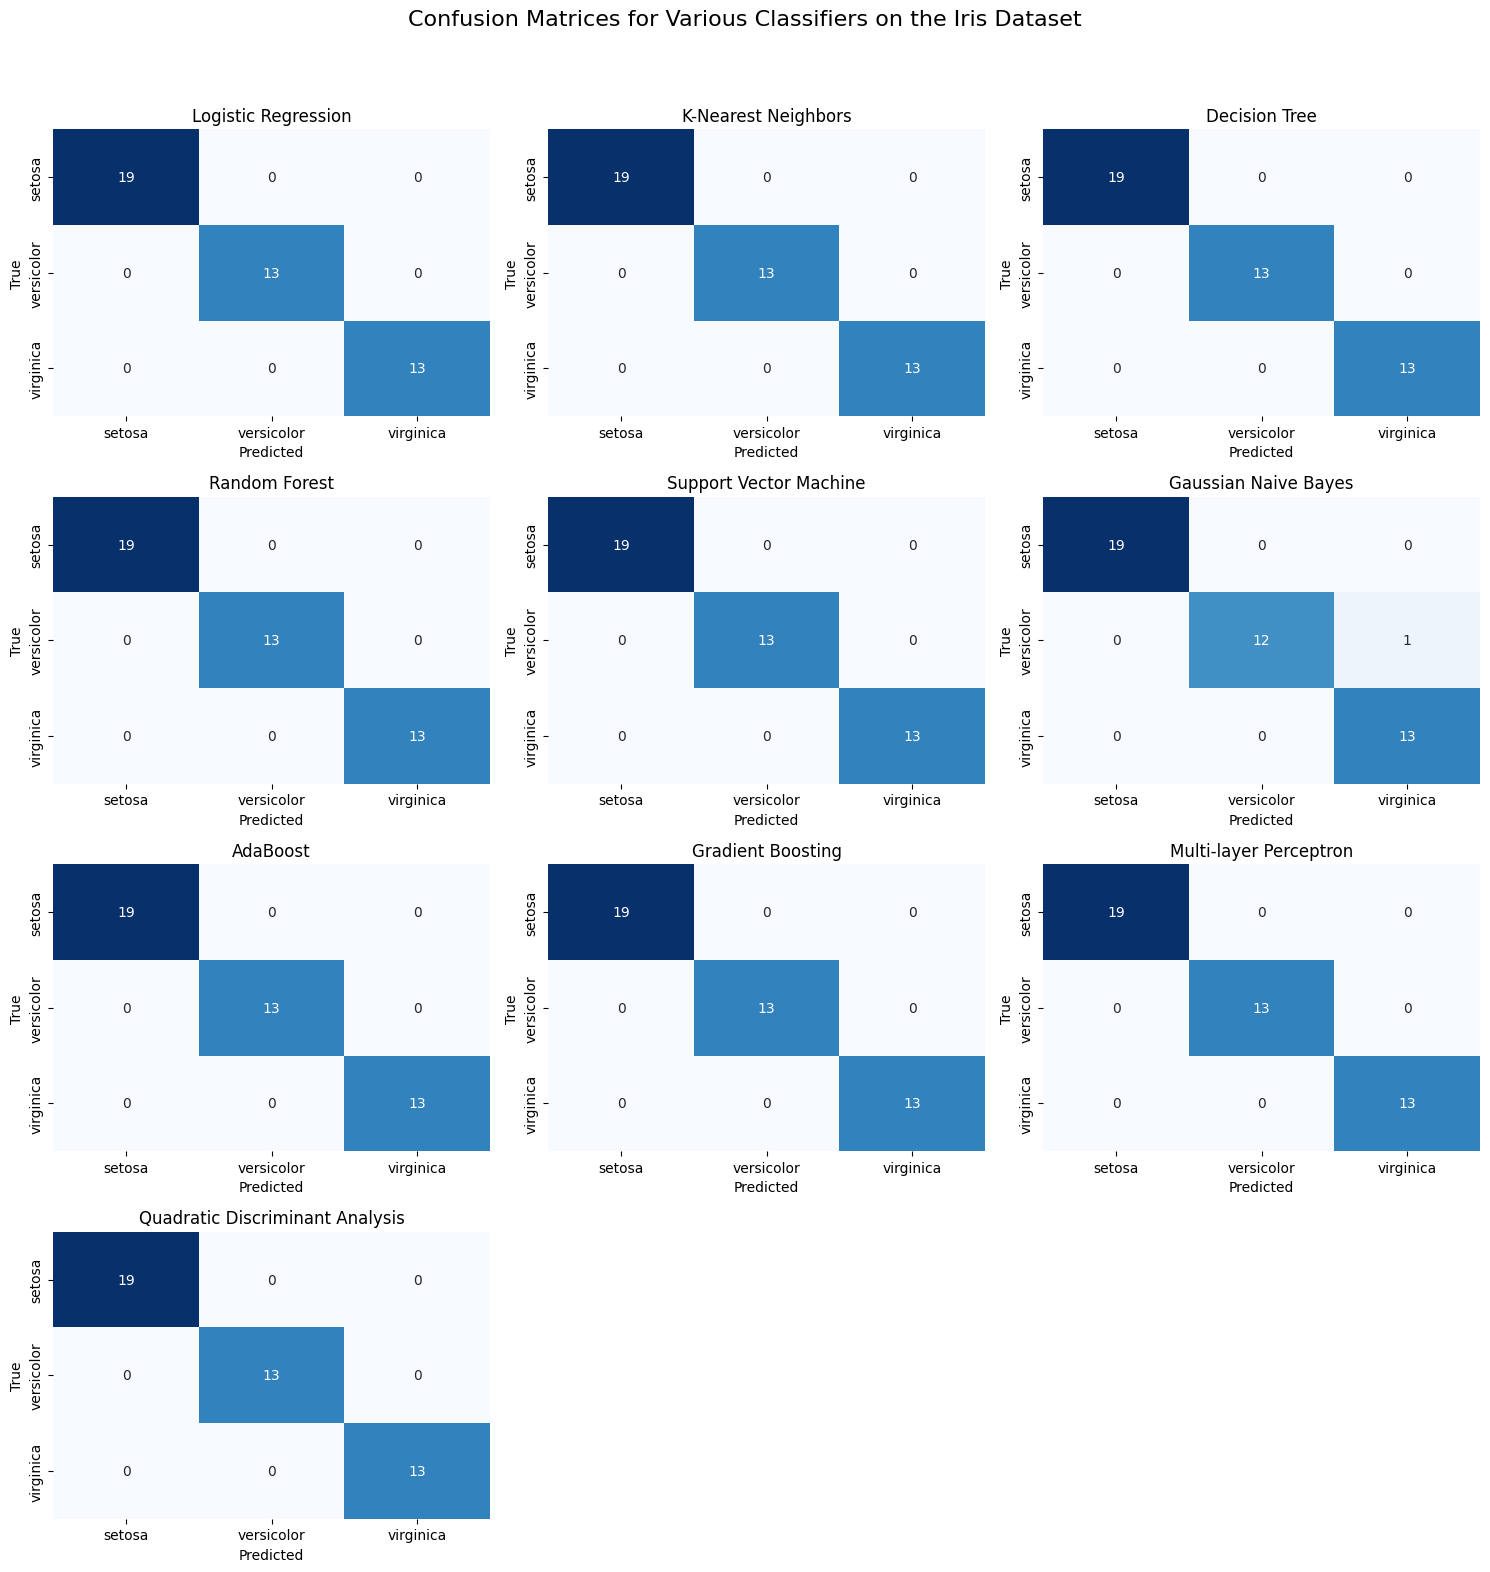

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Import classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Load Iris dataset
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Gaussian Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Multi-layer Perceptron": MLPClassifier(max_iter=1000),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()
}

# Prepare a figure to plot confusion matrices
n_classifiers = len(classifiers)
cols = 3  # adjust columns for layout
rows = int(np.ceil(n_classifiers / cols))
plt.figure(figsize=(cols * 5, rows * 4))
plt.suptitle("Confusion Matrices for Various Classifiers on the Iris Dataset", fontsize=16)

# Loop over classifiers, train, predict, and plot confusion matrix
for idx, (name, clf) in enumerate(classifiers.items(), start=1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Compute confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=target_names)

    print(f"Classifier: {name}")
    print(report)
    print("-" * 60)

    # Plot confusion matrix heatmap
    plt.subplot(rows, cols, idx)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=target_names, yticklabels=target_names)
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("True")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
